<a href="https://colab.research.google.com/github/AnaGutson/AlgebraII/blob/main/Guia_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guía 3**

In [2]:
from sympy import *
from sympy import I as i
init_printing(use_unicode=True)
from typing import List, Dict
import numpy as np
import matplotlib.pyplot as plt
from math import e as e


## **General**

###**Triángulo de Pascal**

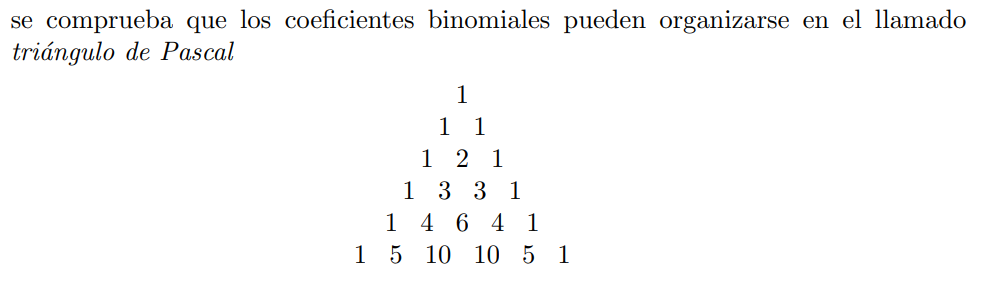

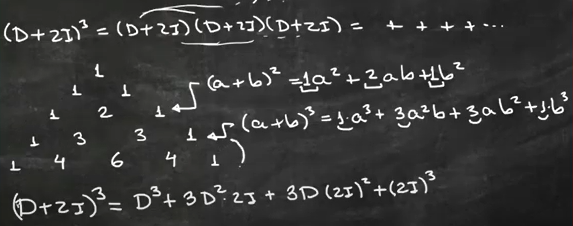

### **Producto Vectorial**

In [ ]:
def vectorial_product(A,B):
  a = Matrix([[A[1], A[2]], [B[1], B[2]]]).det()
  b = Matrix([[A[0], A[2]], [B[0], B[2]]]).det()
  c = Matrix([[A[0], A[1]], [B[0], B[1]]]).det()
  return Matrix([a, -b, c])

###**Traza**

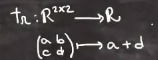

### **Matrices**

In [ ]:
'''
  A.inv                                   -> La inversa de A
  A.T                                     -> La transpuesta de A
  A.transpose()                           -> La transpuesta de A
  A.det                                   -> Determinante de A
  A.normalized()                          -> Matriz normalizada
  A.rref()                                -> Matriz triangulada
  A[1,0]                                  -> Posicion segunda fila primera columna
  A[:,0]                                  -> La primera columna de A
  A[0,:]                                  -> La primera fila de A
  A.col(0)                                -> La primera columna de A
  A.subs(t, pi/3)                         -> Reemplaza las t por pi/3
  A.subs({x1:1, x2:5, x3:7})               -> Reemplaza x1 por 1, x2 por 5...
  Z = zeros(2,1)                          -> Matriz de 0s de 2 filas 1 columna
  eye(n)                                  -> Matriz identidad en n x n
  Matrix.hstack(v1,v2)                    -> Matriz con columnas v1, v2
  Matrix.vstack(v1,v2)                    -> Matriz con filas v1, v2
  Lambda = diag(2, 2, 3)                  -> Matriz diagonal
  x, parametro = B.gauss_jordan_solve(v)  -> Solucion de B.x = v
  simplify(A)                             -> Simplifica A
  expand(A)                               -> Expande A
  n, m = A.shape                          -> Cantidad filas y columnas de A
'''

'''
  Escritura de matriz, ejemplos:

  U = Rational('1/3') * Matrix([[ 2, 2, 1],
                                [-2, 1, 2],
                                [ 1,-2, 2]])
  
  ___________________________________________

  t = Symbol('t')
  A = Matrix([[ cos(t), -sin(t)],
              [ sin(t), cos(t)]])
  A.subs(t, pi/3)

'''


"\n  Escritura de matriz, ejemplos:\n\n  U = Rational('1/3') * Matrix([[ 2, 2, 1],\n                                [-2, 1, 2],\n                                [ 1,-2, 2]])\n  \n  ___________________________________________\n\n  t = Symbol('t')\n  A = Matrix([[ cos(t), -sin(t)],\n              [ sin(t), cos(t)]])\n  A.subs(t, pi/3)\n\n"

### **Polinomios**

In [ ]:
'''
  diff(p,x) -> La derivada de p respecto de x
  p.subs(x,1) -> p(1)
  p.factor() -> factoriza un polinomio
  p.roots() -> las raices del polinomio
  P = plot(p,(x,0,2)) -> grafico del polinomio con x entre 0 y 2
  P = plot(*L, (x,0,2)) -> grafico de una lista de polinomios con x entre 0 y 2
  P[0].line_color = 'red' -> color del primer polimonio
  P.show() -> muestra el grafico del polinomio con x entre 0 y 10
'''

'''
  Escritura de polimomio, ejemplos:

  x, a0, a1, a2 = symbols('x, a0, a1, a2')
  p = a0 + a1*x + a2*x**2
'''

"\n  Escritura de polimomio, ejemplos:\n\n  x, a0, a1, a2 = symbols('x, a0, a1, a2')\n  p = a0 + a1*x + a2*x**2\n"

### **Combinación Lineal**

In [81]:
def gauss_jordan_con_generadores(A: Matrix, z: Matrix): #devuelve la solucion de gauss jordan entera, la sol part y sus generadores
  x, p = A.gauss_jordan_solve(z) 
  
  #hallo sol particular
  x_0 = x
  for i in range(len(p)):  
    x_0 = x_0.subs({p[i]:0}) 
  
  #hallo generadores
  generadores = []
  for i in range(len(p)):
    x_i = x - x_0
    for j in range(len(p)):
      if j != i:
        x_i = x_i.subs({p[j]:0})
    x_i = x_i.subs({p[i]:1})
    generadores.append(x_i)
    
  return x, x_0, generadores

### **Independencia Lineal**

In [82]:
def encontrar_vector_li_a_conjunto(A: List[Matrix]):  #Principio de sustitución de Steinez
  cant_filas, _ = A[0].shape
  A_ld = Matrix.hstack(*A, eye(cant_filas,cant_filas))
  A_li = obtener_vectores_li(A_ld)
  return A_li

#_______________________

def obtener_vectores_li(A: Matrix):
  E_A, pivotes_A = A.rref()
  A_li = []
  for pivote in pivotes_A:
      A_li.append(A.col(pivote))        #De la matriz original
  return A_li

#_______________________

'''
  Ejemplo:
  B = [Matrix([a, 1, 2]), Matrix([3, 2, 3]), Matrix([1, -a, 1])] #una lista
  encontrar_a(B, a)
'''
a = Symbol('a')
def encontrar_a(B: List[Matrix], a: Symbol): #Halla el o los valores que puede tener a para que los vectores sean linealmente independientes: formen una base

    return solve(det(Matrix.hstack(*B)), a)

### **Subespacios**

*   $rango(A)$ $:=$ cantidad de pivotes de $E_A$.
*   $rango(A)$ $:=$ cantidad de filas no nulas de $E_A$.
*   $rango(A)$ $:=$ cantidad de columnas basicas de $A$.

*   $rango(A)$ = $dim(col(A))$ = $dim(fil(A))$.

*   $dim(nul(A))$ = $n$ − $rango(A)$ = $n$ − $dim(col(A))$

  Siendo $n$ = cantidad de columnas de $A$ 

*   $dim(nul(A^T))$ = $m$ − $dim(col(A^T))$ = $m$ − $dim (fil(A))$.

  Siendo $m$ = cantidad de filas de $A$ 

*   yapa: $dim(\mathbb{S})$ = $dim(\mathbb{V})$ - número ecuaciones.


$Bx=v$ tiene solución si y solamente si $v ∈ col(B)$

*   $Bx=v$ tiene solución única $<=>$ las columnas de A forman un conjunto LI $<=>$ $Nul(A)$ = 0 
 
  Si tiene solución única, puedo hacer x = $B^{-1}.v$
*   $Bx=v$ tiene $\infty$ soluciones $<=>$ las columnas de A forman un conjunto LD $<=>$ $Nul(A)$ $\neq$ 0 



In [ ]:
'''  
  A.nullspace() -> devuelve el espacio nulo de A 
  A.columnspace() -> devuelve el espacio columna de A
  A.T.columnspace() -> devuelve el espacio columna de A traspuesta
  A.T.nullspace() -> devuelve el espacio nulo de A traspuesta
  n, m = A.shape -> cantidad de filas y columnas de la matriz
'''

'''
    S: lista de los vectores que generan al subespacio S
    Los pivotes empiezan en 0 (por ej: la segunda columna figuraría con el pivote 1)
'''
def algoritmo_espacio_columna(S: List[Matrix]): #Encuentra el espacio columna de un subespacio
    B_S = Matrix.hstack(*S)
    E_S, pivotes_S = B_S.rref()
    S_li = []
    for pivote in pivotes_S:
        S_li.append(S[pivote])        #De la matriz original
    return S_li, pivotes_S #devuelve la matriz con los vectores que generan el espacio columna y los índices de los pivotes.    

def algoritmo_espacio_filas(S: List[Matrix]): #Encuentra el espacio fila de un subespacio
    B_S = Matrix.hstack(*S).T
    E_S, pivotes_S = B_S.rref()
    S_li = []
    for pivote in pivotes_S:
        S_li.append((E_S[pivote,:]).T) #De la matriz escalonada
    return S_li, pivotes_S #devuelve la matriz con los vectores que generan el espacio fila y los índices de los pivotes.     


'''
    Verifica si dos subespacios son el mismo subespacio devolviendo True para ese 
    caso y False en caso contrario.
    
    Ejemplo:
    S1 = [Matrix([-4, -5, -3]), Matrix([26, 41, 23])]
    bien = [Matrix([11, 18, 10]), Matrix([15, 23, 13])]
    mal_1 = [Matrix([-3, 10, 8]), Matrix([-6, 11, 10])]
    mal_2 = [Matrix([7, 12, 2]), Matrix([9, 14, 1])]
    mal_3 = [Matrix([7, 2, 12]), Matrix([9, 1, 14]), 2 * Matrix([9, 1, 14])]

    dos_subespacios_generan_el_mismo_subespacio(S1, bien), dos_subespacios_generan_el_mismo_subespacio(S1, mal_1), dos_subespacios_generan_el_mismo_subespacio(S1, mal_2), dos_subespacios_generan_el_mismo_subespacio(S1, mal_3)
'''
def dos_subespacios_generan_el_mismo_subespacio(S1: List[Matrix], S2: List[Matrix]):
    
    S1_li, pivotes_S1 = algoritmo_espacio_columna(S1)
    S2_li, pivotes_S2 = algoritmo_espacio_columna(S2)
    
    B_S1_li = Matrix.hstack(*S1_li)
    B_S2_li = Matrix.hstack(*S2_li)
    
    B = Matrix.hstack(B_S1_li, B_S2_li)
    _, pivotes_B = B.rref()
    
    return len(pivotes_B) == len(pivotes_S1) and len(pivotes_B) == len(pivotes_S2)
    

### **Ínfimo y Supremo**

In [ ]:
'''
cant_neg: cantidad de vectores que pertenecen al segundo subespacio
'''
def interseccion_S1_S2_dos_lados(S1: List[Matrix], S2: List[Matrix]):
  S2_neg = [i*(-1) for i in S2]
  B_S1_S2 = Matrix.hstack(*S1,*S2_neg)
  cant_S2 = len(S2)
  nul_B_S1_S2 = B_S1_S2.nullspace()
  S1_int_S2 = []
  for v in nul_B_S1_S2:
      v[(-1)*cant_S2:,:] = zeros(cant_S2, 1)
      S1_int_S2.append(B_S1_S2 * v)

  return S1_int_S2

def union_S1_S2(S1: List[Matrix], S2: List[Matrix]):
    B_S1_S2 = Matrix.hstack(*S1,*S2)
    S1_un_S2 = obtener_vectores_li(B_S1_S2)
    return S1_un_S2                

###**Transformaciones Lineales**

In [ ]:
#Parametros: T una t.l, B una base    
#Devuelve la matriz de la transformacion lineal T a partir de T y una base
def matriz_tl_con_tl_y_base(T: Matrix, B: List[Matrix]): #la matriz de T a partir de B
  TB = Matrix() 
  for i in B:
    ti = T*i
    TB = Matrix.hstack(TB, ti)
  return TB


#Parametros: B una base, W  los transformados de B    
#Devuelve la matriz de la transformacion lineal T a partir de una base, y los transformados de la base    
def matriz_tl_con_base_y_transformados(B: List[Matrix], W: List[Matrix]): #la matriz de T a partir de los transformados de B
    return Matrix.hstack(*W) * Matrix.hstack(*B).inv()

#Parametros: T una t.l, p una lista de polinomios
#Devuelve T(polinomios)
def transformacion_lineal_pol(T: Matrix, polinomios):
  polinomios = [Matrix([i]) for i in polinomios]
  P = Matrix.vstack(*polinomios)
  return (expand(T*P))[0,0] #devuelvo el elemento que está en formato Matriz

### **Monomorfismo, epimorfismo e isomorfismo**

In [ ]:
def clasificacion(At: Matrix):
  imT = At.columnspace()
  nuT = At.nullspace()

  dimW, dimV = At.shape
  if len(nuT) == 0 and len(imT) == dimW:
    return 'T es un isomorfismo'
  else:
    if len(nuT) == 0:
      return 'T es un monomorfismo'
    elif len(imT) == dimW:
      return 'T es un epimorfismo'
  
  return 'T no es un monomorfismo ni un epimorfismo'

### **Imagen y Preimagen**

In [ ]:
'''
    Halla la imagen por T de un subespacio S dada una base B y la imagen por T de B
    
    B: es una lista de vectores que conforman la base B
    W: es una lista de vectores que corresponden a las imágenes de los vectores de la base B
    S: es una lista de vectores que generan el subespacio S
'''
def imagen_por_T_de_S_con_B_y_W(B: List[Matrix], W: List[Matrix], S: List[Matrix]): 
    # Obtengo la matriz de T
    A_T = matriz_tl_con_base_y_transformados(B, W)

    # Obtengo los transformados de S    
    imagen_T_S = A_T * Matrix.hstack(*S)

    # Armo una base con los transformados de S    
    base_T_S = obtener_vectores_li(imagen_T_S)
    
    return base_T_S

#_______________________________________________________________________________


#Forma 1, explicada arriba
def preimagen_subespacio_con_At(At: Matrix, Au: Matrix):
  
    return (Au*At).nullspace()
    
#_______________________________________________________________________________

#Forma 2, explicada arriba
def preimagen_subespacio_con_B_y_W(B: List[Matrix], W: List[Matrix], Au: Matrix):
    B_matrix = Matrix.hstack(*B)
    W_matrix = Matrix.hstack(*W)

    sol = (Au * W_matrix).nullspace()
    preimagen_U = B_matrix * Matrix.hstack(*sol)

    #Obtengo una base de la preimagen
    B_T_inv_U = obtener_vectores_li(preimagen_U)
    
    return B_T_inv_U


### **Coordenadas**

In [ ]:
def coordenadas_v_en_B(v: Matrix, B):
  M_B = Matrix.hstack(*B) 
  
  #v = M_B * [v]^B
  vB, pivotes = M_B.gauss_jordan_solve(v)
  
  return vB

def imagen_de_T_con_At_B_Bprima(At_B_Bprima: Matrix, Bprima: List[Matrix]):
  
  #Obtengo Col(At) = gen{[T(v)]^B' ... }
  imagenBprima = At_B_Bprima.columnspace()

  #Quiero Im(T) = gen{T(v) ... }
  #Es decir, necesito escribir los [T(v)]^B' como T(v)
  #T(v) = M_Bprima * [T(v)]^B'
  imagen = Matrix.hstack(*Bprima) * Matrix.hstack(*imagenBprima)
  
  base_imagen = obtener_vectores_li(imagen)
  
  return base_imagen

def nucleo_de_T_con_At_B_Bprima(At_B_Bprima: Matrix, B: List[Matrix]):
  
  #Obtengo Nul(At) = gen{[x]^B ... }
  nucleoB = At_B_Bprima.nullspace()

  #Quiero Nu(T) = gen{x ... }
  #Es decir, necesito escribir los [x]^B como x
  #x = M_B * [x]^B
  nucleo = Matrix.hstack(*B) * Matrix.hstack(*nucleoB)
  
  base_nucleo = obtener_vectores_li(nucleo)
  
  return base_nucleo

def nucleo_de_T_con_At_B_Bprima_pol(At_B_Bprima: Matrix, B: List[Matrix]):
  
  #Obtengo Nul(At) = gen{[x]^B ... }
  nucleoT = T1oT2inv_Eprima_E.nullspace()
  
  #Quiero Nu(T) = gen{x ... }
  #Es decir, necesito escribir los [x]^B como x
  #x = M_B * [x]^B

  nucleo = Ep * Matrix.hstack(*nucleoT)
  
  return nucleo 

### Graficar

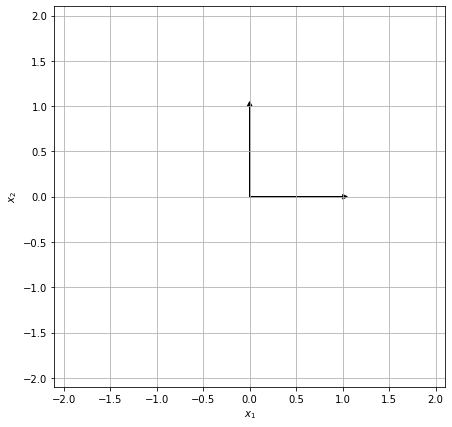

In [53]:
def plot_vector2d(*vectors,xlim=(0,1),ylim=(0,1)):
  fig, ax = plt.subplots(1,1,figsize=(7,7))

  for v in vectors:
    x, y = float(v[0]), float(v[1])
    ax.arrow(0,0,x,y,head_width=0.05, head_length=0.05, fc='k', ec='k')
  
  ax.set_xlim(*xlim)
  ax.set_ylim(*ylim)
  ax.grid(True)
  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')
  fig.show()
  return fig, ax

def plot_recta_simetria(theta,ax):
  x1, x2 = ax.get_xlim()

  if theta not in [pi/2,-pi/2]:
    y1 = float(tan(theta/2*x1))
    y2 = float(tan(theta/2*x2))
  else:
    y1, y2 = ax.get_ylim()
  
  ax.arrow(x1,y1,x2-x1,y2-y1,fc='b',ec='b')
  return ax

def graficar_dos_funciones(f1,f2):
  p1 = plot(f1,xlim=(-1,1),ylim=(-2,2),show=False,line_color='blue')
  p2 = plot(f2,xlim=(-1,1),ylim=(-2,2),show=False,line_color='red')
  p1.append(p2[0])
  p1.show()

v1, v2 = Matrix([1,0]), Matrix([0,1])
fig, ax = plot_vector2d(v1,v2,xlim=(-2.1,2.1),ylim=(-2.1,2.1))

### **Proyecciones y Simetrías**

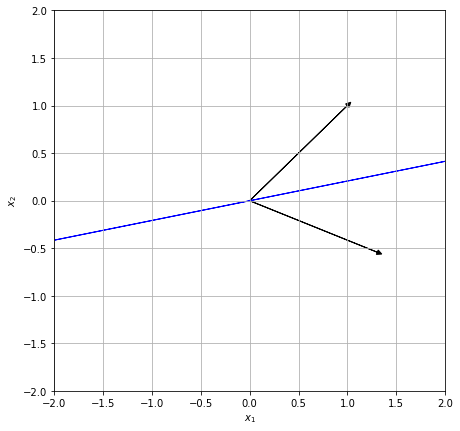

In [ ]:
def simetria(v,theta):
  S = Matrix([[cos(theta), sin(theta)],
              [sin(theta), -cos(theta)]])
  w = S * v
  return w

v = Matrix([1,1])
theta = pi/8

v_s = simetria(v,theta)
fig, ax = plot_vector2d(v,v_s,xlim=(-2,2),ylim=(-2,2))
ax = plot_recta_simetria(theta,ax)

#__________________________

def tipo_tl(T: Matrix):
  T2 = T*T
  n,m = T2.shape
  if T2 == T:
    return 'Es una proyección'
  elif T2 == eye(n,n):
    return 'Es una simetría'
  return 'No es proyección ni simetría'
  


### **Rotaciones**

In [ ]:
def rotacion(v,theta):
  R = Matrix([[cos(theta), -sin(theta)],
              [sin(theta), cos(theta)]])
  w = R * v
  return w

#Ejemplo
v = Matrix([0,1])
theta = pi/4

v_r = rotacion(v,theta)
fig, ax = plot_vector2d(v,v_r,xlim=(-2,2),ylim=(-2,2))

### **Ecuaciones Diferenciales**

In [ ]:
def nucleo_de_operador_diferencial(L):
    x = Symbol('x')
    Nu_L = set()
    raices = str(L).split('*')
    l = 1
    for raiz in raices:

      if '-' in raiz:
        index = raiz.index('-') + 1
        l = (int(raiz[index]))*(-1)
      elif '+' in raiz:
        index = raiz.index('+') + 1
        l = (int(raiz[index]))
      else:
        display(raiz)
      
      if '^' in raiz:
        k = int(raiz.split('^')[1])
      else:
        k = 1
          
      for i in range(k):
        Nu_L.add((x**(i))*exp(-l*x))

    return Nu_L

def gen_solucion_particular(L, AoL):
    Nu_L = nucleo_de_operador_diferencial(L)
    Nu_AoL = nucleo_de_operador_diferencial(AoL)
    Nu = set()
    Nu = Nu_L | Nu_AoL
    Nu = Nu - Nu_L
    return list(Nu)

D, I = symbols('D I')
L = '(D-5I)*(D+2I)^2'
AoL = '(D-5I)*(D+2I)^5'
gen_solucion_particular(L, AoL)

## **Específico**

### Funciones

In [55]:
def angulo(x: Matrix, y: Matrix, producto_interno, G: Matrix=None):
    return acos(producto_interno(x, y, G) / (norma(x, producto_interno, G) * norma(y, producto_interno, G)))

def area_de_un_paralelogramo(G: Matrix):
    return G.det()

def area_de_un_triangulo(G: Matrix):
    return 1/2 * sqrt(area_de_un_paralelogramo(G))


#Litte
def producto_interno_matrices_3_x_3(A: Matrix, B: Matrix):
    return 1/2 * (B.T * A).trace()

def matriz_de_gram(producto_interno, G_B, *vectores_ordenados):
  """
  Dado un producto interno, una matriz de Gram que define ese producto interno (si es de matrices
  enviar cualquier cosa) y una lista de vectores ordenados devuelve la matriz de Gram de esos vectores

  producto_interno: es el nombre de una función definida
  G_B: es la matriz de Gram del producto interno
  *vectores_ordenados: es una lista de vectores que se tienen que mandar ordenados
  """
  G = eye(len(vectores_ordenados))
  for i in range(len(vectores_ordenados)):
      for j, vector in enumerate(vectores_ordenados):
          G[i,j] = producto_interno(vectores_ordenados[i], vectores_ordenados[j], G_B)

  return G

def distancia_de_un_vector_a_un_subespacio(v, B, G, producto_interno):
    '''AGARRAR CON PINZAS'''
    _v_tilda = v_tilda(v, B, G, producto_interno)
    return sqrt(producto_interno(v, v, G) - (_v_tilda.T * G.inv() * _v_tilda)[0])

def resolver_area_de_un_triangulo_en_el_origen(G_B: Matrix, v1: Matrix, v2: Matrix, producto_interno):
    '''
    Calcula el área del triángulo de vértices v1 y v2 (siendo nunguno el vector nulo)
    
    Ejemplo:
    v1 = Matrix([1, 1, 0])
    v2 = Matrix([1, 0, 1])
    G_B = Matrix([[1, 1, 1], [1, 2, 2], [1, 2, 3]])
    resolver_area_de_un_triangulo_con_uno_de_los_vertices_en_el_origen(G_B, v1, v2, producto_interno_por_definicion)
    '''
    G_v1_v2 = matriz_de_gram(producto_interno, G_B, v1, v2)
    return area_de_un_triangulo(G_v1_v2)
   
def resolver_area_de_un_triangulo_corrido_del_origen(G_B: Matrix, v1: Matrix, v2: Matrix, v3: Matrix, producto_interno):
    '''
    Calcula el área del triángulo de vértices v1, v2, y v3 (siendo nunguno el vector nulo)
    
    Ejemplo:
    v1 = Matrix([3, 1, 2])
    v2 = Matrix([4, 2, 2])
    v3 = Matrix([4, 1, 3])
    G_B = Matrix([[1, 1, 1], [1, 2, 2], [1, 2, 3]])
    resolver_area_de_un_triangulo_con_uno_de_los_vertices_en_el_origen(G_B, v1, v2, v3, producto_interno_por_definicion)
    '''
    w1, w2, w3 = v1-v1, v2-v1, v3-v1
    G_w2_w3 = matriz_de_gram(producto_interno, G_B, w2, w3)
    return area_de_un_triangulo(G_v1_v2)    

def v_tilda(x: Matrix, B: List[Matrix], G: Matrix, producto_interno):
    return Matrix([producto_interno(x, B[i], G) for i in range(len(B))])

def proyeccion_ortogonal_de_un_vector_a_un_subespacio(x: Matrix, B: list, G: Matrix, producto_interno):
    return G.inv() * v_tilda(x, B, G, producto_interno)

def matriz_de_proyeccion_sobre_S1_en_direccion_de_S2_en_coordenadas_canonicas(S1: List[Matrix], S2: List[Matrix]):
    '''
    Arma la matriz de proyección sobre un subespacio S1 en dirección de otro subespacio S2 en coordenadas
    canónicas dadas dos listas con vectores generadores de cada subespacio en particular.
    
    S1: lista de vectores que generan al subespacio S1 (sobre el que se quiere proyectar)
    S1: lista de vectores que generan al subespacio S2 (la dirección)
    '''
    B_S1 = Matrix.hstack(*S1)
    B_S2 = Matrix.hstack(*S2)
    B = Matrix.hstack(B_S1, B_S2)
    
    P_BB = eye(B.rank())
    for i in range(B_S1.rank(), B_S1.rank()-1, -1):
        P_BB[i, i] = 0
        
    return B * P_BB * B.inv()

def matriz_de_simetria_sobre_S1_en_direccion_de_S2_en_coordenadas_canonicas(S1: List[Matrix], S2: List[Matrix]):
    '''
    Arma la matriz de simetríá sobre un subespacio S1 en dirección de otro subespacio S2 en coordenadas
    canónicas dadas dos listas con vectores generadores de cada subespacio en particular.
    
    S1: lista de vectores que generan al subespacio S1 (sobre el que se quiere hacer la simetría)
    S1: lista de vectores que generan al subespacio S2 (la dirección)
    '''
    B_S1 = Matrix.hstack(*S1)
    B_S2 = Matrix.hstack(*S2)
    B = Matrix.hstack(B_S1, B_S2)
    
    S_BB = eye(B.rank())
    for i in range(B_S1.rank(), B_S1.rank()-1, -1):
        S_BB[i, i] = -1
        
    return B * S_BB * B.inv()

'''
Q, R = A.QRDecomposition()
'''

'\nQ, R = A.QRDecomposition()\n'

###**Producto Interno**

Un producto interno en un $\mathbb K$-espacio vectorial $\mathbb V$ es una función $\langle\cdot, \cdot\rangle$: $\mathbb V \times \mathbb V \rightarrow \mathbb K$ que posee las siguientes propiedades:

$\quad$ (i) Para cada $\lambda \in \mathbb K$ y $x, y, z \in \mathbb V$:

$\quad\quad\quad$ a) $\langle x + y, z\rangle$ = $\langle x, z\rangle + \langle y, z\rangle$.

$\quad\quad\quad$ b) $\langle \lambda x, y\rangle$ = $\lambda \langle x, y\rangle$.

$\quad$ (ii) $\langle x, y\rangle$ = $\overline{\langle y, x\rangle} \quad \forall x, y \in \mathbb V$.

$\quad\quad\rightarrow$ Si $\mathbb V$ es un $\mathbb R$-espacio vectorial, entonces $\langle x, y\rangle = \langle y, x\rangle$

$\quad$ (iii) $\langle x, x\rangle > 0$ si $x \neq 0$.

Como consecuencia:

$\quad\quad \langle x, \lambda y\rangle = \bar{\lambda} \langle x, y\rangle $

\\

**Ortogonalidad**. Los vectores $x, y$ son ortogonales entre sí sii $\langle x, y \rangle = 0$. El conjunto de todos los vectores ortogonales a $x$ se escribe $x^{\perp}$, y se llama el subespacio ortogonal a $x$:
$$x^{\perp} := \left \{ y \in \mathbb V: \langle y, x \rangle = 0 \right \}$$ 

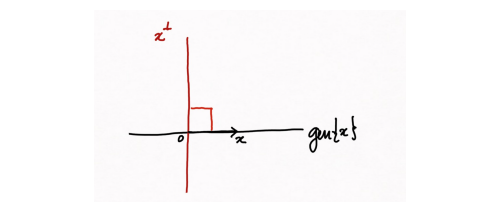

Sea $\left(\mathbb V, \langle \cdot , \cdot \rangle \right)$ un espacio euclideo, la función $\| \cdot \|: \mathbb V \rightarrow \mathbb R^{+}$ definida por $$\| x \| := \sqrt{\langle x,x \rangle},$$ se denomina la norma inducida por el producto interno $\langle \cdot , \cdot \rangle$. Al número no negativo $\|x\|$ se lo denomina la norma de $x$. 

La norma de $x$ representa la longitud del segmento de recta $\overrightarrow{0x}$

Vale que:

1. $\|x\| = 0$ sii $x = 0$.
2. $\|\lambda x\| = |\lambda| \|x\| \quad \forall \lambda \in \mathbb K, x \in \mathbb V$.
3. $\|x+y\| \leq \|x\| + \|y\| \forall x,y \in \mathbb V$

**Pitágoras**. Si $x \perp y$ entonces, $$\|x + y\|^2 = \|x\|^2 + \|y\|^2.$$ 

Nótese que: $$ \langle x, y \rangle + \langle y, x \rangle = \langle x, y \rangle + \overline{\langle x, y \rangle} = 2Re(\langle x, y \rangle)$$

\\

**Desigualdad de Cauchy-Schwarz.** Sea $(\mathbb V, \langle \cdot,\cdot\rangle )$ un espacio euclídeo. Para todo $x, y \in \mathbb V$ vale que $$|\langle x, y \rangle| \leq \|x\| \|y\|.$$

\\

**Desigualdad triangular.** La desigualdad triangular $$\|x+y\| \leq \| x\| + \|y\|$$

In [66]:
def producto_interno_canonico(x, y, G: Matrix = None):
    return (y.T * x)[0]

def producto_interno_por_definicion(x: Matrix, y: Matrix, G: Matrix):
    return (y.T * G * x)[0]
    
def producto_interno_polinomios_integral(p, q, G:Matrix = None, limite_inferior=-1, limite_superior=1, a=1):
    return integrate(p * q * a, (x, limite_inferior, limite_superior))

def norma(x, producto_interno, G: Matrix=None):
    return sqrt(producto_interno(x, x, G))

###**Matriz de Gram**

A la tabla de multiplicar de dos vectores linealmente independientes $x$ e $y$ se la denomina la matriz de Gram del conjunto $\{x, y\}$, la cual se denota como $$G_{\{ x, y\}} =  \begin{bmatrix}\langle x,x\rangle & \langle x,y\rangle \\ \langle x,y\rangle & \langle y,y\rangle\end{bmatrix}$$

Si tomamos el triángulo de vértices $0, x, y$ y llamamos 

$ \quad \bullet$ $l_x$ a la longitud del lado $\overrightarrow{0x} $,  $\quad\bullet$ $l_y$ a la longitud del lado $\overrightarrow{0y} $  $\quad$ y  $\quad$ $\bullet$ $\theta = \sphericalangle(x,y)$ 

Entonces podemos escribir la matriz de Gram como: $$G_{\{ x, y\}} =  \begin{bmatrix}l_x^2 & l_x l_y \cos \theta \\ l_x l_y \cos \theta  & l_y^2\end{bmatrix}$$

La matriz de Gram se puede utilizar para calcular el producto interno $\langle x,y \rangle$: $$\langle x,y \rangle = x^T G \space  \bar y$$
O bien: $$\langle x,y \rangle = \bar y^T G^T x$$

\\

Dada $A \in \mathbb R^{2\times 2}$, $A =\begin{bmatrix}a&b\\c&d\end{bmatrix}$. Para que $\langle x,y\rangle = y^T A$ $x$ sea un producto interno en $\mathbb R^2$, entonces debe cumplirse que:
* $b = c$,
* $a > 0$,
* $det(A) > 0$

Es decir, $A = \begin{bmatrix}a&b\\b&d\end{bmatrix}\quad$ con $\quad a>0, \quad det(A)>0 $

\\

Si $\mathcal L = \{v_1, \dots, v_n\} \subset \mathbb V$ es un conjunto linealmente independiente, entonces la matriz de Gram de $\mathcal L$ es inversible.

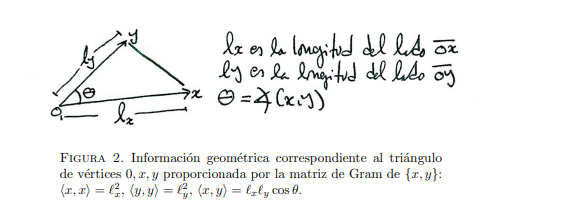

Se deduce que el determinante de $G_{\{ x, y\}}$ es el cuadrado del área del paralelogramo generado por los vectores $x$ e $y$: $$det\left(G_{\{ x, y\}}\right) = l_x^2l_y^2sen^2\theta$$

\\

El área del paralelogramo es el doble del área A del triángulo de vértices $0, x, y$. De la identidad: $$det\left(G_{\{ x, y\}}\right) = 4A^2.$$
Entonces $$A = \frac12 \sqrt{det\left(G_{\{ x, y\}}\right)}$$

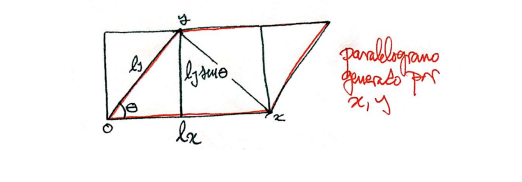

In [ ]:
def obtener_matriz_Gram(producto_interno, B):
    
    x = Symbol('x') # Variable independiente
    n = len(B) # Cantidad de componentes de la base

    # Inicializo la matriz de Gram
    G = zeros(n,n)
    
    # Lleno la matriz calculando los productos internos
    for i, p in enumerate(B):
        for j, q in enumerate(B):
            G[i,j] = producto_interno(p,q,x)
    
    return G 

###**Proyección Ortogonal**

Sea la proyección de $\mathbb V$ sobre el subespacio $\mathbb S$ en la dirección del subespacio $\mathbb S^\perp$:
$$P_\mathbb S(y) = \Pi_{\mathbb S \mathbb S^\perp}$$

$$Im(P_\mathbb S) = \mathbb S \quad y \quad Nu(P_\mathbb S) = \mathbb S^\perp$$

\\

Sea $B = \{w_1, \dots, w_n\}$ una base de $\mathbb S$. Vale que $$\mathbb S^\perp = \{w_1, \dots, w_n\}^\perp$$

Notar que $$\mathbb S \oplus \mathbb S^\perp = \mathbb V$$

Por lo que se cumple que $(\mathbb S^\perp)^\perp = \mathbb S$

Además, $$P_{\mathbb S^\perp} = I_\mathbb V - P_\mathbb S$$

Por último vale que $$v = P_\mathbb S (v) + P_{\mathbb S^\perp} \quad \text y \quad \|v\|^2 = \|P_\mathbb S (v)\|^2 + \|P_{\mathbb S^\perp}\|^2$$ 

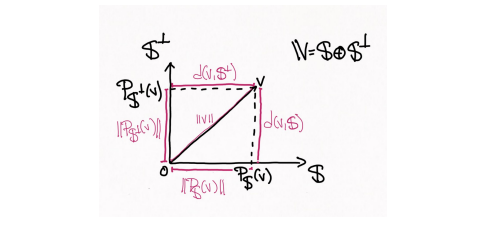

$\rightarrow$ **Si $dim(\mathbb S)$ = 1** 

Se llama proyección ortogonal de $y$ sobre el subespacio $S$ generado por $x$ a $$P_{gen\{x\}}(y) := \frac{\langle y, x\rangle}{\|x\|^2}x.$$

Otra forma es planteando: $$P_{gen\{x\}}(y) \in S ⇔ P_{gen\{x\}}(y) = k.x $$

Entonces $$\langle y - P_{gen\{x\}}(y), x\rangle = 0 \quad→\quad  \langle y - k.x, x\rangle = 0$$



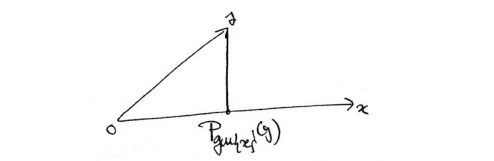

$\rightarrow$ **Si $dim(\mathbb S)$ > 1** 

En caso de tener un subespacio $\mathbb S$ generado por $B = \{v_1, v_2, v_3\}$ y querer hallar la proyección ortogonal de $y$ sobre $\mathbb S$, es decir $\tilde y$, se procede de la siguiente manera:

Se pide que:
* $\tilde y = \alpha _1  v_1 + \alpha _2  v_2 + \alpha _3  v_3 $
* $y - \tilde y \perp v_1$
* $y - \tilde y \perp v_2$
* $y - \tilde y \perp v_3$

Esto resulta en $$ G_B^T \begin{bmatrix}\alpha _1\\\alpha_2\\\alpha_3\end{bmatrix} = \underbrace{\begin{bmatrix} \langle y,v_1 \rangle \\ \langle y,v_2 \rangle \\ \langle y,v_3 \rangle \end{bmatrix}}_\tilde y$$

Entonces $$[P_\mathbb S(y)]^B = (G_B^T)^{-1} \tilde y$$

Finalmente $$P_\mathbb S(y) = M_B [P_\mathbb S(y)]^B$$



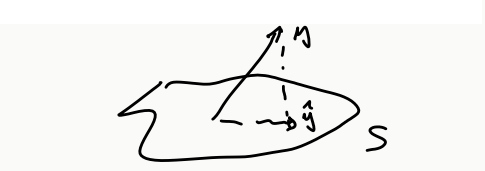

In [ ]:
def y_tilda_polinomios(y, B: List, producto_interno, G: Matrix = None):
    return Matrix([producto_interno(y, B[i], G) for i in range(len(B))])

def proyeccion_ortogonal_de_v_a_S_un_generador(v, gen, producto_interno, G: Matrix = None):
  return producto_interno(v, gen) * gen / norma(gen, producto_interno)**2

### **Distancia**

Todo espacio euclídeo $(\mathbb V, \langle \cdot, \cdot\rangle)$ se convierte en un espacio métrico definiendo la distancia entre sus puntos, $d :\mathbb V \times \mathbb V \rightarrow \mathbb R^+$,  mediante $$d(x,y) := \| y - x \|.$$

Cumple las siguientes propiedades:
1. Para $x, y \in \mathbb V: d(x, y) = 0$ sii $x = y$.
2. $d(x,y) = d(y,x) \quad\forall x,y \in \mathbb V \quad$ *(simetría)*.
3. $d(x,y) \leq d(y,z) + d(z,y) \quad\forall x,y,z \in \mathbb V \quad$ *(desigualdad triangular)*.

Además presenta:

* Invarianza por traslaciones: $d(x,y) = d(x + z, y + z)$
* Cambio de escala por dilataciones: $d(\lambda x, \lambda y) = |\lambda| d(x,y)$

\\

Sea $(\mathbb V, \langle \cdot,\cdot\rangle)$ un espacio euclídeo y sea $\mathcal W$ un subconjunto no vacío de $\mathbb V$. Para cada $v \in \mathbb V$, la distancia entre $v$ y $\mathcal W$ se define por $$d(v, \mathcal W) := \inf_{w \in \mathcal W} \| v-w\|$$ 

\\

Como la distancia de $v$ al subespacio $S$ generado por $x$ satisface que $$\|v - P_\mathbb S (v)\| = \min_{w\in\mathbb S}\|v - w\|$$
Entonces, $$d(v, \mathbb S) = \|v- P_\mathbb S (v)\| = \left\|P_{\mathbb S^\perp}(v)\right\|$$
Del mismo modo $$d(v, \mathbb S^\perp) = \|v- P_{\mathbb S^\perp} (v)\| = \left\|P_\mathbb S(v)\right\|$$

\\

La distancia entre dos funciones se puede expresar como $$d(f,g) = \sqrt{\int_{-1}^{1} \left(f(x) - g(x)\right)^2 \; dx.}$$ Es decir $$d^2(f,g) = \int_{-1}^{1} \left(f(x) - g(x)\right)^2 \; dx.$$

\\

Por último, como $\|v\|^2 = \|P_\mathbb S (v)\|^2 + \|P_{\mathbb S^\perp}\|^2$, entonces $$ \|v\|^2 = d^2(v, \mathbb S) + d^2(v, \mathbb S^\perp) $$


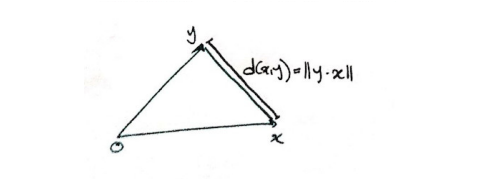

In [ ]:
def distancia_entre_funciones(f1, f2, producto_interno, G: Matrix = None):
  f = f1 - f2
  d = sqrt(producto_interno(f,f))
  return float(d)


###**Ángulo** 

Se define el ángulo entre $x$ e $y$, $\theta = \sphericalangle (x, y)$, mediante $$\theta := \arccos \left( \frac {\langle x, y \rangle}{\|x\|\|y\|} \right).$$

Si $x \perp y \Leftrightarrow \langle x, y \rangle = 0$ significa que $\sphericalangle (x,y) = \frac{\pi}{2}.$

\\

**Aditividad.** Sean $x, y \in \mathbb V \setminus \{0\}$ dos vectores linealmente independientes y sea $z = t_1x + t_2 y$ con $t_1, t_2 > 0$. Vale que $$\sphericalangle (x,y) = \sphericalangle (x,z) + \sphericalangle (z,y)$$  

###**Minimización**



El mínimo de $\| y - \lambda x \|$ se alcanza en $\lambda = \frac{\langle y,x\rangle}{\|x\|^2}$ y el valor mínimo alcanzado es $$\min_{\lambda \in \mathbb R} \|y - \lambda x\| = \sqrt{\frac{\|x\|^2\|y\|^2 - \langle x,y\rangle^2}{\|x\|}} = \|y\|\sin\theta$$


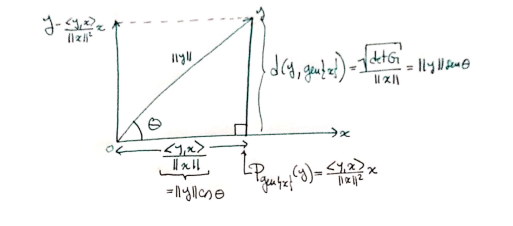

##**Notas**

##**Ejercicios**

###**Ejercicios Generales**

#### Hallar un vector $v \in \mathbb R^2$ tal que el triángulo determinado por $0, e_1, v$ sea rectángulo en $0$ e isósceles con el producto interno dado por $G = \begin{bmatrix}4&1\\1&1\end{bmatrix}$

In [110]:
e1 = Matrix([1,0])
G = Matrix([[4,1],
            [1,1]])

#Busco que sea rectángulo en 0, es decir, que se formen 90°
#<v, e1> = 0
#e1.T . G . v = 0
sol, sp, gen = gauss_jordan_con_generadores((e1.T*G), zeros(1,1))
gen = gen[0]*4 #lo multiplico para que no tenga fracciones
#entonces v pertenece a gen([-1 4]), es decir v = k.[-1 4]

#Busco que sea isósceles
#||v|| = ||e1||
#Averiguo norma de e1
norma_e1 = norma(e1, producto_interno_por_definicion, G) #entonces ||v|| = 2
#||v||^2 = <v,v> = <k[-1 4], k[-1 4]> = k^2 <[-1 4], [-1 4]> = k^2 norma([-1 4])^2
norma_gen = norma(gen, producto_interno_por_definicion, G)**2
#Entonces k^2 * 12 = ||v||^2 = 4
valores_k = roots(x**2 * 12 - 4)

valores_k = list(valores_k.keys())

v1 = valores_k[0]*gen
v2 = valores_k[1]*gen

⎛⎡  √3  ⎤  ⎡-√3 ⎤⎞
⎜⎢  ──  ⎥  ⎢────⎥⎟
⎜⎢  3   ⎥  ⎢ 3  ⎥⎟
⎜⎢      ⎥, ⎢    ⎥⎟
⎜⎢-4⋅√3 ⎥  ⎢4⋅√3⎥⎟
⎜⎢──────⎥  ⎢────⎥⎟
⎝⎣  3   ⎦  ⎣ 3  ⎦⎠

#### Se considera el espacio euclídeo $\left(C\left([-1, 1]\right), \langle \cdot, \cdot\rangle\right)$ con el producto interno definido por $$\langle f, g \rangle := \int_{-1}^{1} f(x)g(x) \,dx $$

**( a )** Hallar la proyección ortogonal de $y = \sin(\pi x)$ sobre $\mathbb R_3[x]$ 

**( b )** Calcular $$ \min_{p \in\mathbb{R}_3[x]} \int_{-1}^{1} (\sin(\pi x) - p(x))^2 \; dx. $$

**( c )** Calcular la distancia de $y = x^3$ al complemento ortogonal del subespacio $gen\left\{\sin(\pi x) \right\}$

(a) Tengo $$y = \sin (\pi x), \quad B = \{1, x, x^2, x^3\} \space (\text{base de } \mathbb S), \quad \tilde y: \text{ la proyeccion ortogonal de } y \text{ sobre } S$$

Pido que:
* $\tilde y = \alpha _1  1 + \alpha _2  x + \alpha _3  x^2 + \alpha _4  x^3$
* $y - \tilde y \perp 1$
* $y - \tilde y \perp x$
* $y - \tilde y \perp x^2$
* $y - \tilde y \perp x^3$

Esto resulta en $$ G_B^T \begin{bmatrix}\alpha _1\\\alpha_2\\\alpha_3\\\alpha_4 \end{bmatrix} = \underbrace{\begin{bmatrix} \langle y,1 \rangle \\ \langle y,x \rangle \\ \langle y,x^2 \rangle \\ \langle y,x^3 \rangle\end{bmatrix}}_\tilde y$$

Entonces $$[P_\mathbb S(v)]^B = (G_B^T)^{-1} \tilde y$$

Finalmente $$P_\mathbb S(v) = M_B [P_\mathbb S(v)]^B$$


(b) Uso que $$d(f,g) = \sqrt{\int_{-1}^{1} \left(f(x) - g(x)\right)^2 \; dx.}$$ Entonces $$d^2(f,g) = \int_{-1}^{1} \left(f(x) - g(x)\right)^2 \; dx.$$

Sé que $$d^2(f,g) = \|y - \tilde y\|^2$$


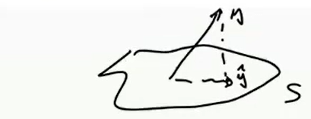

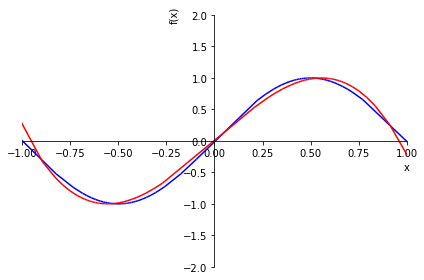

In [72]:
x = Symbol('x')
y = sin(pi*x)
B = [1, x, x**2, x**3]

#(a)
#Aca utilizo el producto interno producto_interno_polinomios_integral porque ya lo tengo definido con los limites que me pide, sino tendría que redefinirlo. 
G = obtener_matriz_Gram(producto_interno_polinomios_integral, B)
y_tilda = y_tilda_polinomios(y, B, producto_interno_polinomios_integral)
p_coord = G.T.inv() * y_tilda
p_hat = (Matrix(B).T * p_coord)[0]
graficar_dos_funciones(y, p_hat)

#(b)
distancia_entre_funciones(y, p_hat, producto_interno_polinomios_integral)

#(c)
P = proyeccion_ortogonal_de_v_a_S_un_generador(x**3, sin(pi*x), producto_interno_polinomios_integral)
#d(x^3, Uperp) = ||Pu(x^3)||^2
float(norma(P, producto_interno_polinomios_integral)**2)

###**Ejercicios Stop**

#### 3.**4.** Sea $(\mathbb V, \langle \cdot, \cdot \rangle)$ un $\mathbb R$-espacio euclídeo de dimensión 3 y sea $\mathcal B = \{u_i : i \in \mathbb I_3\} \subset \{u \in \mathbb V: \| u\| = 1\}$ una base de $\mathbb V$ tal que $\| u_i + u_j \|^2 = 2 + \sqrt 3$ y $\| u_i - u_j \|^2 = 2 - \sqrt 3$ para $i \neq j.$

(**a**) Hallar la matriz del producto interno $\langle \cdot, \cdot\rangle $ respecto de la base $\mathcal B$.

(**b**) Hallar la matriz $\Theta := [\arccos(\langle u_i, u_j\rangle)]_{i \in \mathbb I_3 \\ j \in \mathbb I_3}$.

(**c**) Construir un triángulo rectángulo cuyos vértices sean $0, u_1, u_2 - \lambda u_1$, con $\lambda \in \mathbb R$. ¿Es único?

(**d**) Calcular el área del triángulo de vértices $0, u_1, u_2$.

(**e**) Calcular el área del triángulo de vértices $u_1, u_2, u_3$.

Medio dificil de programar, [acá](https://campus.fi.uba.ar/pluginfile.php/493070/mod_label/intro/Ejercicio_5%20%281%29.pdf)  está la resolución 